<a href="https://colab.research.google.com/github/cscyangj/yolo_project/blob/main/yolo_v5_jiyu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

下载代码并且检查运行环境，想要使用GPU(修改->笔记本设置)

**阻止Colab自动掉线**

在colab上训练代码，页面隔一段时间无操作之后就会自动掉线，之前训练的数据都会丢失。不过好在最后终于找到了一种可以让其自动保持不离线的方法，用一个js程序自动点击连接按钮。代码如下：
```
js
function ClickConnect(){
  console.log("Working"); 
  document
    .querySelector("#top-toolbar > colab-connect-button")
    .shadowRoot
    .querySelector("#connect")
    .click()
}
 
setInterval(ClickConnect,60000)
```



In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 15679, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15679 (delta 1), reused 2 (delta 0), pack-reused 15672
Receiving objects: 100% (15679/15679), 14.39 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (10747/10747), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 22.5 MB/s eta 0:00:00


In [3]:
#%pip list
import torch
import utils

#check env
display = utils.notebook_init()

YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


# 运行检测inference
detect.py runs YOLOv5 inference on a variety of sources, downloading models automatically from the latest YOLOv5 release, and saving results to runs/detect

```
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 41.9ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, 43.0ms
Speed: 0.5ms pre-process, 42.4ms inference, 60.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


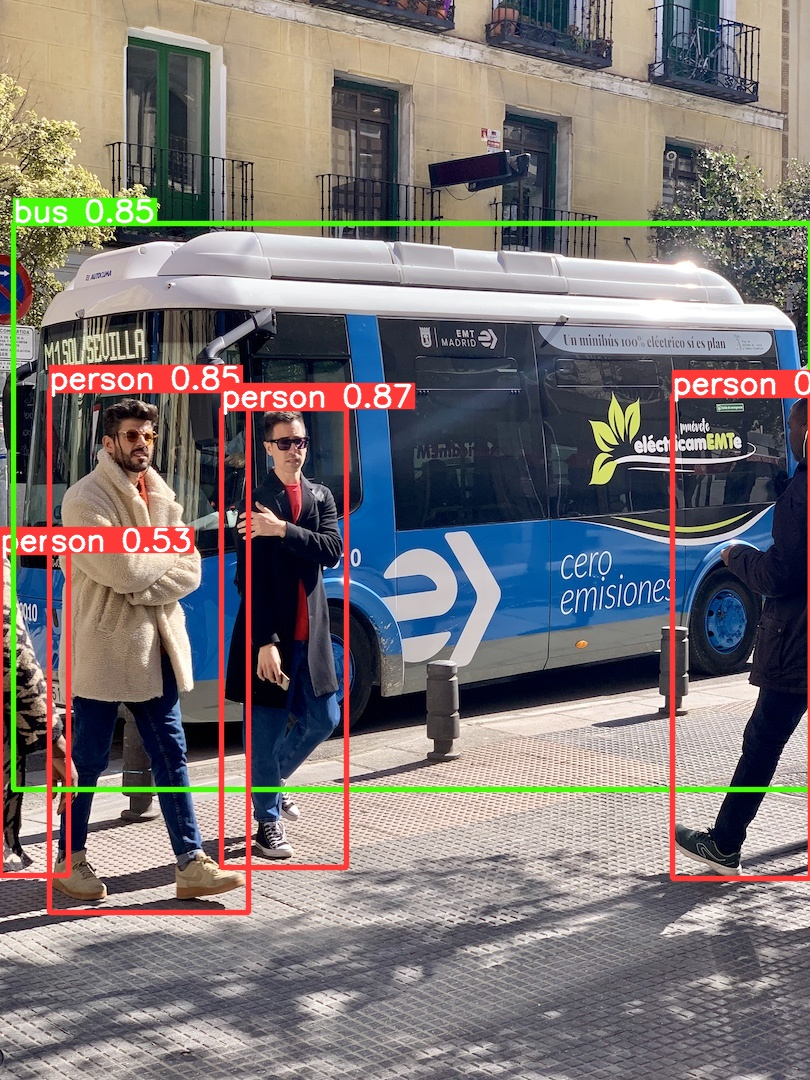

In [7]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.3 --source data/images

# 检测结果保存在runs/detect/exp3目录
display.Image(filename='runs/detect/exp3/bus.jpg', width = 600)

# validate on coco dataset
Validate a model's accuracy on the COCO dataset's val or test splits.To show results by class use the --verbose flag.

In [8]:
# Download COCO Val data
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip') # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

100%|██████████| 780M/780M [00:22<00:00, 35.9MB/s]


In [10]:
#Validate YOLO on COCO Val
!python val.py --weight yolov5s.pt --data coco.yaml --img 640

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:03<00:00, 1431.66it/s]
val: New cache created: /content/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 157/157 [01:30<00:00,  1.74it/s]
                   all       5000      36335      0.672      0.519 

In [14]:
# 查看当前路径和文件
!pwd
!ls -al
!ls ../ -al
!ls ../datasets/ -al

/content/yolov5
total 14836
drwxr-xr-x 11 root root     4096 May 17 03:37 .
drwxr-xr-x  1 root root     4096 May 17 03:37 ..
-rw-r--r--  1 root root     7831 May 17 03:24 benchmarks.py
-rw-r--r--  1 root root      393 May 17 03:24 CITATION.cff
drwxr-xr-x  2 root root     4096 May 17 03:24 classify
-rw-r--r--  1 root root     5009 May 17 03:24 CONTRIBUTING.md
drwxr-xr-x  5 root root     4096 May 17 03:24 data
-rw-r--r--  1 root root    14293 May 17 03:24 detect.py
-rw-r--r--  1 root root     3701 May 17 03:24 .dockerignore
-rw-r--r--  1 root root    39115 May 17 03:24 export.py
drwxr-xr-x  8 root root     4096 May 17 03:24 .git
-rw-r--r--  1 root root       75 May 17 03:24 .gitattributes
drwxr-xr-x  4 root root     4096 May 17 03:24 .github
-rwxr-xr-x  1 root root     3998 May 17 03:24 .gitignore
-rw-r--r--  1 root root     7736 May 17 03:24 hubconf.py
-rw-r--r--  1 root root    34523 May 17 03:24 LICENSE
drwxr-xr-x  5 root root     4096 May 17 03:31 models
-rw-r--r--  1 root root     1

# 训练

1. load custom dataset(coco128)

2. 训练模型

3. 检查推理结果

4. option，可视化训练方式(Comet工具)

In [15]:
# train yolov5s on coco128, 4 epochs, use pre-trained weight
!python train.py --img 640 --batch 16 --epochs 4 --data=coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=4, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 44.4ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 45.8ms
Speed: 0.5ms pre-process, 45.1ms inference, 43.9ms NMS per image at shape (1, 3, 640, 6

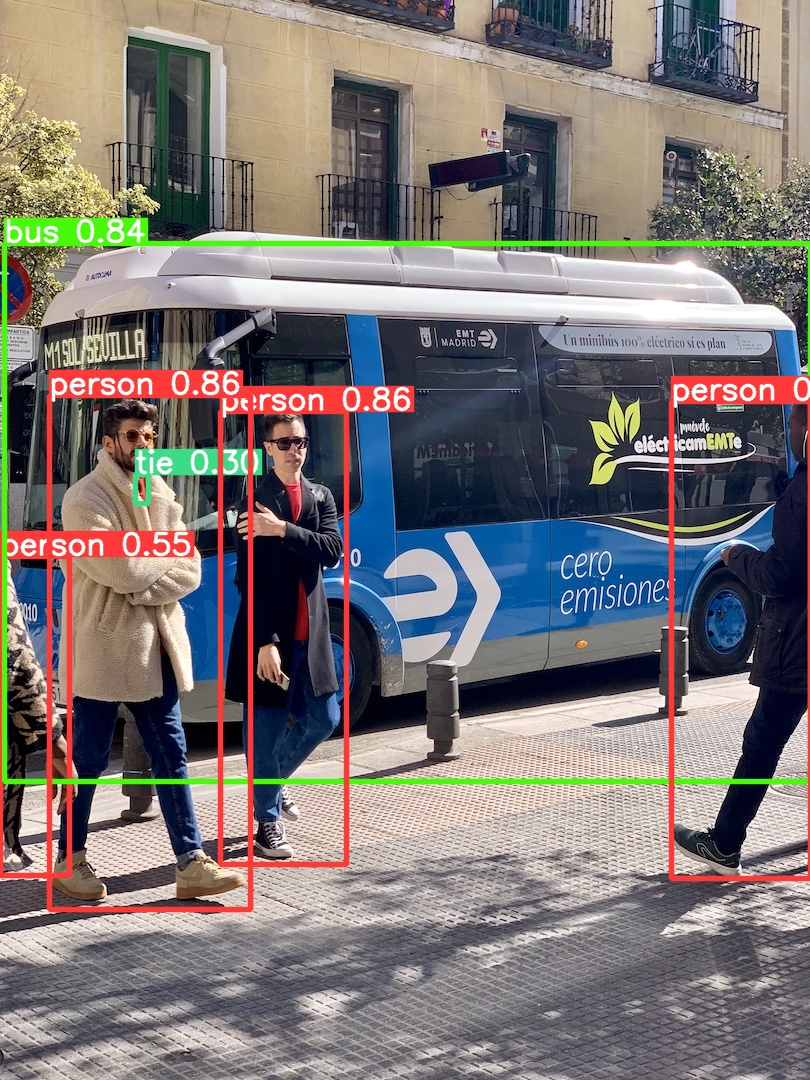

In [18]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp6/bus.jpg', width = 600)